from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

비지도 학습
비지도 학습이란 알고있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 종류의 머신러닝
학습 알고리즘은 입력 데이터만으로 데이터에서 지식을 추출할 수 있어야 한다.

< 비지도 학습의 종류 >
1. 비지도 변환 (unsupervised transformation)
2. 군집 (clustering)

1. 비지도 변환 (unsupervised transformation)

데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘.

비지도 변환이 널리 사용되는 분야는 특성이 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원축소다.

차원 축소의 대표적 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 경우이다.

데이터를 구성하는 단위나 성분을 찾기도 한다.
(예를들어 많은 텍스트 문서에서 주제를 추출하는 것)

C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


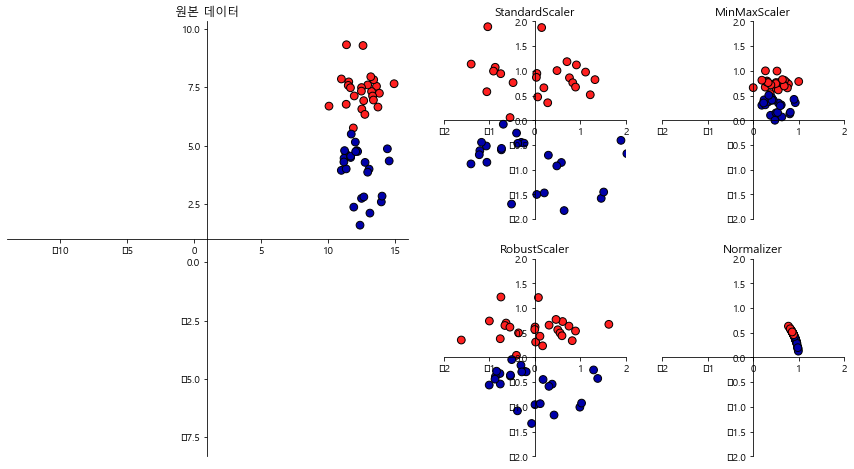

In [3]:
import mglearn
mglearn.plots.plot_scaling()

위 그림은 두 개의 특성을 인위적으로 만든 이진 분류 데이터 셋이다.

x축은 10~15의 값을 가지고  y축은 1~9의 값을 가진다.



오른쪽의 4가지 그림은 데이터를 기준이 되는 범위로 변환하는 네가지 방법이다.

StandardScaler는 각 특성의 평균을 0 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.

RobustScaler는 특성들이 같은 스케일을 같게 된다는 통계적 측면에서는 비슷하지만, 중간값과 사분위값을 사용한다.

이런 방식 때문에 전체 데이터와 아주 동떨어진 데이터의 영향을 받지 않는다.(이런 데이터를 이상치라 한다, outlier)

MinmaxScaler는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경한다.

Normalizer는 벡터의 유클리디안 길이가 1의 되도록 데이터 포인트를 조정한다.
(지름이 1인 구에 데이터 포인트를 투영한다.) 
이러한 정규하는 득성 벡터의 길이는 상관 없고 데이터의 방향이 중요할 때 많이 사용한다.

In [4]:
%matplotlib inline
from preamble import *
plt.rcParams["image.cmap"]="gray"

In [5]:
import warnings
warnings.filterwarnings(action="ignore")

스케일링을 왜 해야할까요?
변수의 크기가 너무 작거나 너무 큰 경우 해당 변수가 target에 미치는 영향력이 제대로 표현되지 않을 수 있습니다
sklean의 대표적인 스케일링 함수로는 특정변수의 최대 최소값으로 조절하는 min-max스케일링과 z정규화가 있습니다

<유방암 데이터셋 커널SVM(SVC)를 적용하고 MinmaxScaler를 이용하여 전처리하자.>  
1. 유방암 데이터 적재하여 테스트/훈련세트로 나누기

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
cancer=load_breast_cancer()
cancer_data=cancer.data
cancer_df=pd.DataFrame(data=cancer.data,
                      columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,...,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,...,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,...,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,...,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,...,0.40,0.16,0.24,0.08


In [7]:
print("feature들의 최소값")
print(cancer_df.min())
print("feature들의 최대값")
print(cancer_df.max())

feature들의 최소값
mean radius                6.98e+00
mean texture               9.71e+00
mean perimeter             4.38e+01
mean area                  1.44e+02
mean smoothness            5.26e-02
mean compactness           1.94e-02
mean concavity             0.00e+00
mean concave points        0.00e+00
mean symmetry              1.06e-01
mean fractal dimension     5.00e-02
radius error               1.12e-01
texture error              3.60e-01
perimeter error            7.57e-01
area error                 6.80e+00
smoothness error           1.71e-03
compactness error          2.25e-03
concavity error            0.00e+00
concave points error       0.00e+00
symmetry error             7.88e-03
fractal dimension error    8.95e-04
worst radius               7.93e+00
worst texture              1.20e+01
worst perimeter            5.04e+01
worst area                 1.85e+02
worst smoothness           7.12e-02
worst compactness          2.73e-02
worst concavity            0.00e+00
worst concave 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)
# 569개의 데이터 포인트를 426개의 훈련세트,143개의 테스트 세트로 나눴다.

(426, 30)
(143, 30)


[MinMaxScaler를 이용하여 전처리 후 속성값 확인하기]

In [24]:
# 전처리 파이썬 클래스 임포트
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# MinMaxScaler의 fit 메서드는 훈련세트에 있는 특성마다 최대/최소값을 계산한다.
scaler.fit(X_train)#y_train은 사용하지 않는다

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
# fit 메서드로 학습한 변환을 적용하려면 스케일 객체의 transform 메서드를 사용한다.
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력
print("변환된 후 크기: {}".format(X_train_scaled.shape))
# 변환된 후 크기: (426, 30)

# 데이터 스케일을 변환해도 개수에는 변화 없다. 
print("스케일 조정 전 특성별 최소값: {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값: {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값: {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최소값: {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값: [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값: [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최소값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


변환된 데이터의 배열 크기는 원래 데이터와 동일하다.
각 속성의 값이 0~1으로 변형되었다.

데이터 변환 적용하기

In [26]:
X_test_scaled=scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값: {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최소값: {}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값: [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최소값: [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


유방암 데이터셋 데이터 전처리를 하기전의 성능

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.2f}".format(svm.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test,y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


[MinMaxScaler를 사용하여 데이터 전처리 후 성능]

In [30]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)
# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled,y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled,y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled,y_test)))

스케일 조정된 훈련 세트 정확도 : 0.99
스케일 조정된 테스트 세트 정확도 : 0.97


StandardScaling
z-score라고 하는데 데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다
데이터의 평균이 0 표준편차가 1이되도록 스케일링합니다

[StandardScaler를 사용하여 데이터 전처리 후 성능]

In [32]:
print("feature들의 최소값")
print(cancer_df.mean())
print("feature들의 최대값")
print(cancer_df.var())

feature들의 최소값
mean radius                1.41e+01
mean texture               1.93e+01
mean perimeter             9.20e+01
mean area                  6.55e+02
mean smoothness            9.64e-02
mean compactness           1.04e-01
mean concavity             8.88e-02
mean concave points        4.89e-02
mean symmetry              1.81e-01
mean fractal dimension     6.28e-02
radius error               4.05e-01
texture error              1.22e+00
perimeter error            2.87e+00
area error                 4.03e+01
smoothness error           7.04e-03
compactness error          2.55e-02
concavity error            3.19e-02
concave points error       1.18e-02
symmetry error             2.05e-02
fractal dimension error    3.79e-03
worst radius               1.63e+01
worst texture              2.57e+01
worst perimeter            1.07e+02
worst area                 8.81e+02
worst smoothness           1.32e-01
worst compactness          2.54e-01
worst concavity            2.72e-01
worst concave 

In [34]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled_standard = standard_scaler.transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)
# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled_standard,y_train)

print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled_standard,y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled_standard,y_test)))

스케일 조정된 훈련 세트 정확도 : 1.00
스케일 조정된 테스트 세트 정확도 : 0.96


1. 주성분 분석 (principal component analysis): 가장 간단하고 널리 사용하는 알고리즘
2. 비음수 행렬 분해 (non-negative matriz factorization): 특성 추출에 널리 사용
3. t-SNE 알고리즘 (t-distributed stochastic neighbor embedding): 2차원 산점도를 이용해 시각화 용도로 많이 사용

< 1. 주성분 분석(PCA) - 유방암 데이터셋 시각화 하기 >

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다.

회전한 뒤에 데이터를 설명하는데 얼마나 중요하냐에 따라 특성 일부만 선택된다.

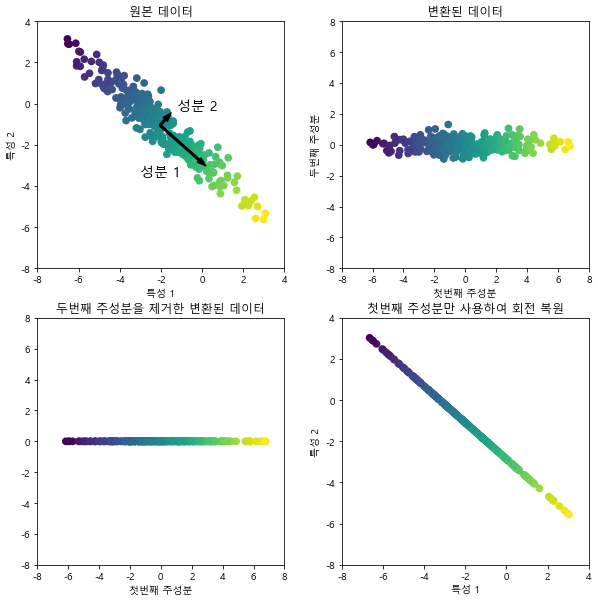

In [35]:
import mglearn
mglearn.plots.plot_pca_illustration()

1. PCA 알고리즘은 성분1이라고 쓰여있는 분산이 가장 큰 방향을 찾는다.
이 방향(벡터)는 이 성분1에대한 가장 많은 정보를 담고 있는 방향이다.
2. 그 다음 첫번째 방향과 직각인 방향중에 가장 많은 정보를 담은 방향을 찾는다. (component 2)
이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 하여 주성분(principal component) 이라고 한다. 일반적으로 원본 특성의 개수 만큼 있다.

그림2 : 주성분 1과 2를 각각 x출과 y축에 나란하게 회전
그림3 : 주성분 일부만 남기는 차원 축소로 첫번째 주성분만 유지
그림4 : 그림 3에서 데이터에 평균을 더해 반대로 회전
 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 종종 사용한다.

< PCA를 적용해 유방암 데이터셋 시각화 하기 >

PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화이다.
악성과 양성 두 클래스에 대해 각 특성의 히스토그램을 그려보자.

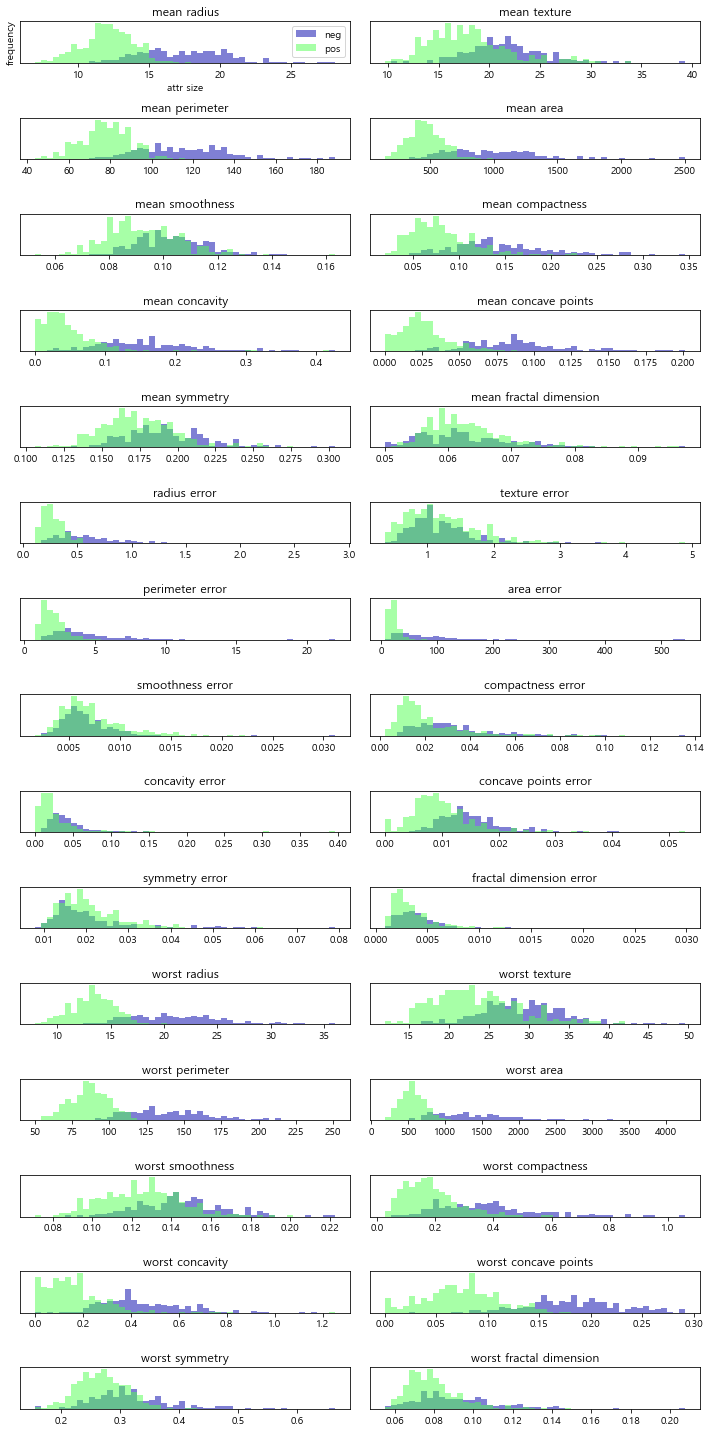

In [36]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import mglearn
cancer = load_breast_cancer()
fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("attr size")
ax[0].set_ylabel("frequency")
ax[0].legend(["neg","pos"],loc="best")
fig.tight_layout()
plt.show()

각 그래프는 히스토그램 2개를 겹쳐 놓은것으로 
초록색 : 양성, 파란색: 음성 클래스이다.
이를 통해 어떤 특성이 양성과 악성 샘플을 구분하는데 더 좋은지 가늠해 볼 수 있다.
예를들어 아래의 "worst concave points"특성은 두 히스토그램이 확실히 구분되어 매우 유용한 특성이다.

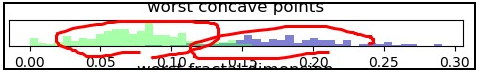

그러나 이 그래프는 특성간의 상호작용에 대해선 전혀 알려주지 못한다.

[처음 두개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도]
pca적용 전에 StandardScaler를 사용해 데이터 스케일 조정

In [37]:
standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)
X_scaled = standard_scaler.transform(cancer.data)

In [39]:
# PCA 객체를 생성하고 fit메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소한다.
# 기본값일때 PCA는 데이터를 회전만 시키고 모든 주성분을 유지한다.
# 데이터의 차원을 줄이려면 PCA 객체를 지정하면 된다.
from sklearn.decomposition import PCA
# 데이터 첫 2개의 성분만 유지한다.
pca = PCA(n_components=2)
# PCA 모델 만들기
pca.fit(X_scaled)
# 처음 두개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


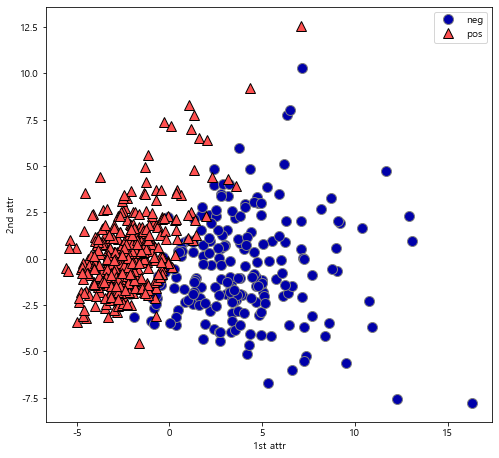

In [40]:
# 두개의 주성분을 그래프로 나타내자.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["neg","pos"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

두 클래스가 2차원 공간에서 꽤 잘 구분된다.
이런 그림이라면 선형 분류기에서도 충분히 잘 구분할 수 있다.
하지만, PCA의 단점은 그래프의 두 축을 해석하기 쉽지 않다는 점이다.
주성분은 원본 디에터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형대이다.
PCA 객체가 학습될때 components_ 속성에 주성분이 저장된다.

In [46]:
print("PCA 주성분: {}".format(pca.components_.shape))
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: (2, 30)
PCA 주성분: [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


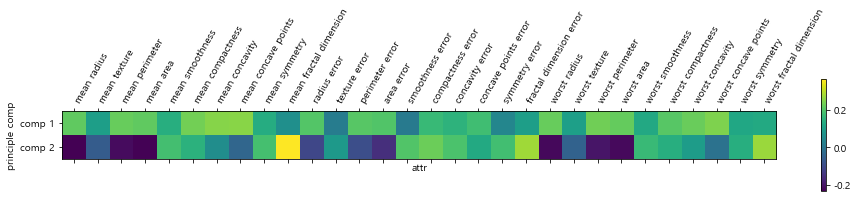

In [47]:
# 히트맵 시각화 하기
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["comp 1", "comp 2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("attr")
plt.ylabel("principle comp")
plt.show()

첫번째 주성분 (첫번째 가로 줄)의 모든특성은 부호가 같다.
이 말은 모든 특성 사이에 공통의 상호관계가 있다는 뜻이다.
따라서 한 특성의 값이 커지면 다른 값들도 높아질 것이다.

두번째 주성분의 특성은 부호가 섞여있다.
따라서 2번째 주성분의 축이 가지는 의미는 파악하기 힘들다.

아이리스 데이터셋에 적용하기

In [111]:
from sklearn.datasets import load_iris
iris = load_iris()
# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
standard_scaler = StandardScaler()
standard_scaler.fit(iris.data)
X_scaled = standard_scaler.transform(iris.data)

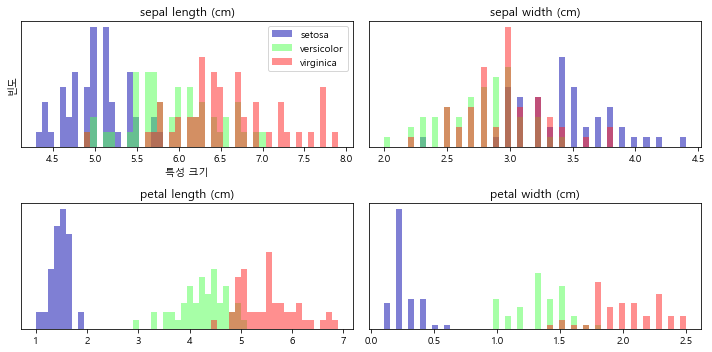

In [112]:
fig, axes = plt.subplots(2,2, figsize = (10,5))
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]
ax = axes.ravel()

for i in range(4):
    _, bins = np.histogram(iris.data[:,i], bins = 50)
    ax[i].hist(setosa[:,i], bins = bins, color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(versicolor[:,i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].hist(virginica[:,i], bins = bins, color = mglearn.cm3(1), alpha = .5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(['setosa', 'versicolor','virginica'], loc = 'best')
fig.tight_layout()

In [113]:
# PCA 객체를 생성하고 fit메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소한다.
# 기본값일때 PCA는 데이터를 회전만 시키고 모든 주성분을 유지한다.
# 데이터의 차원을 줄이려면 PCA 객체를 지정하면 된다.
from sklearn.decomposition import PCA
# 데이터 첫 2개의 성분만 유지한다.
pca = PCA(n_components=2)

# PCA 모델 만들기
pca.fit(X_scaled)

# 처음 두개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (150, 4)
축소된 데이터 형태 : (150, 2)


In [114]:
print('pca 주성분 shape:{}'.format(pca.components_.shape))
print('pca 주성분 : {}'.format(pca.components_))

pca 주성분 shape:(2, 4)
pca 주성분 : [[ 0.522 -0.263  0.581  0.566]
 [ 0.372  0.926  0.021  0.065]]


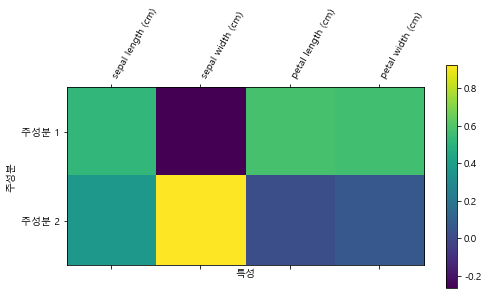

In [115]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["주성분 1", "주성분 2"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)), iris.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

군집 : 데이터셋을 클러스터(cluster)라는 그룹으로 나누는 작업

한 클러스터 안의 데이터 포인트 끼리는 매우 비슷하고 다른 클러스터 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표

< k-평균 군집 >
k-평균(k-mean)군집은 가장 간단하고 널리 사용하는 군집 알고리즘이다.
데이터의 어떤 영역을 대표하는 클러스터 중심을 찾는다.

1. 데이터 포인트를 가장 가까운 클러스터 중심에 할당한다.
2. 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정한다.
이 두단계를 반복하고 할당되는 데이터 포인트에 변화가 없을때 종료한다.

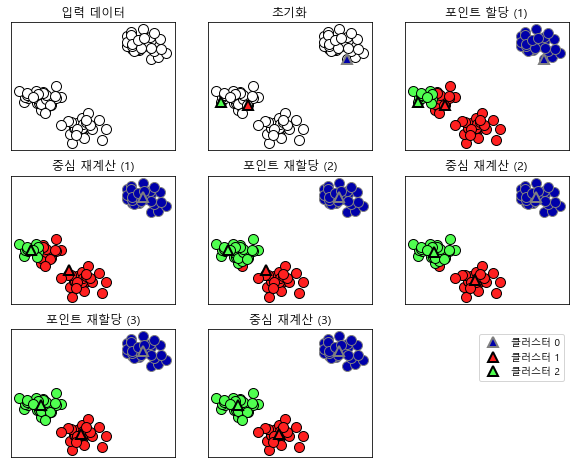

In [117]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

클러스터 중심으로 삼을 데이터 포인트 3개를 무작위로 초기화.
1. 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당
2. 할당한 포인트의 평균값으로 클러스터 중심을 갱신
위 과정을 반복하면서 포인트에 변화가 없으면 알고리즘 종료

[k-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계]

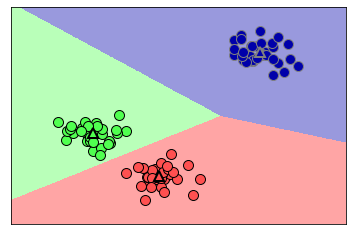

In [120]:
import mglearn

mglearn.plots.plot_kmeans_boundaries()

In [129]:
#인위적인 데이터셋(make_blobs)을 사용해 적용해보자.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


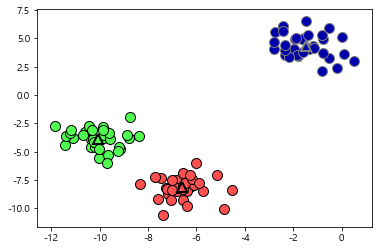

In [130]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

클러스터 레이블:
[0 2 2 2 3 3 3 2 4 0 2 2 1 4 1 3 3 0 2 2 3 2 3 0 2 1 3 0 0 1 4 4 1 0 2 3 2
 2 2 3 3 2 0 2 2 3 4 0 4 0 2 1 3 3 4 3 2 2 4 0 2 3 3 2 2 3 4 3 0 2 2 2 3 4
 4 2 3 3 0 2 4 2 2 3 0 0 4 0 2 4 3 0 4 2 2 3 1 4 3 0]


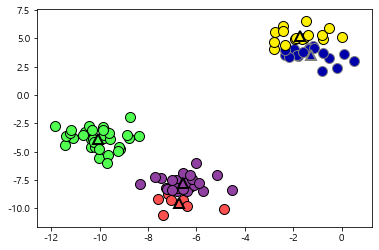

In [133]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print("클러스터 레이블:\n{}".format(kmeans.labels_))
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2,3,4], markers='^', markeredgewidth=2)

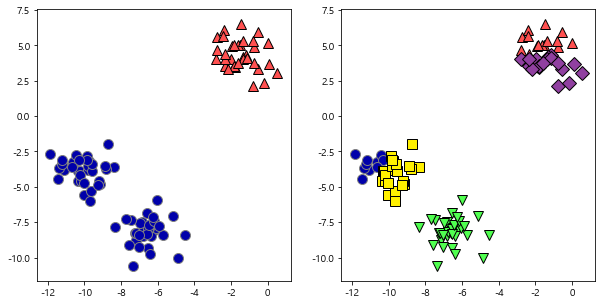

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두개의 클러스터 중심
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 다섯개의 클러스터 중심
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

< k-평균 알고리즘이 실패하는 경우 >

데이터셋의 클러스터 개수를 정확하게 알고 있더라고 항상 이를 구분해낼 수 있는 것은 아니다.
각 클러스터를 정의하는것이 중심 하나뿐이므로, 클러스터는 둥근 형태로 나타난다.

In [ ]:
k평균 군집

In [ ]:
데이터 과학 견습생에 도움- 데이터를 공짜로 사용할 수 있다

https://www.kaggle.com
https://www.kaggle.com/c/titanic